<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/19_CNN_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 커널크기 (3,3,1), 필터 개수 32개로 원소의 가중치의 크기는 (3,3,1,32)
# 필터마다 1개의 절편이 있어 (32,) 크기

(3, 3, 1, 32) (32,)


In [4]:
# weight 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체
# numpy() 메서드로 넘파이 배열로 변환
conv_weights = conv.weights[0].numpy()

# 평균, 표준편차
print(conv_weights.mean(), conv_weights.std())

# 가중치의 평균값은 0에 가깝고 표준편차는 0.27

-0.019439656 0.23001778


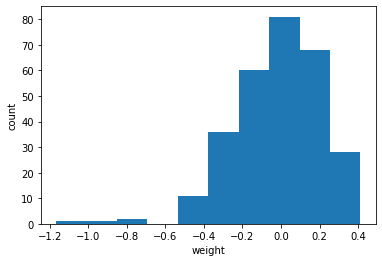

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 0을 중심으로 종 모양 분포를 띠고 있음

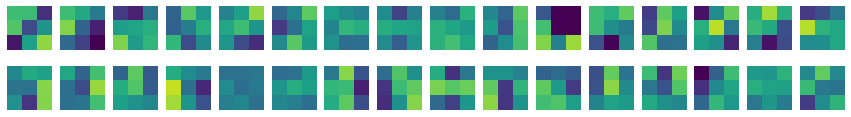

In [7]:
# 32개의 커널을 16개씩 두 줄에 출력
# 가중치 값이 무작위가 아닌 어떤 패턴을 볼 수 있음
# vmin, vmax로 픽셀 표현 범위 지정
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2) :
  for j in range(16) :
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

In [10]:
# 훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
# (3x3 커널을 가진 필터 32개)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
# 평균은 비슷하지만 표준편차는 이전과 달리 매우 작다

-0.0010081615 0.07870515


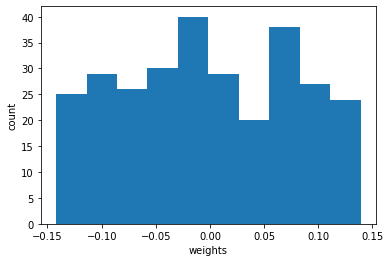

In [15]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()
# 대부분 가중치가 -0.15 ~ 0.15
# 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값 선택

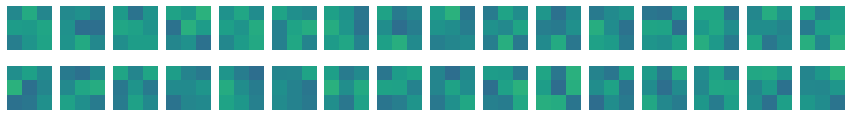

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2) :
  for j in range(16) :
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')

plt.show()

# 전체적으로 가중치 밋밋하게 초기화

In [17]:
# 모델 객체의 입력 얻기
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [18]:
# model.input과 model.layers[0].output을 연결하는
# 새로운 conv_acti 모델 생성
conv_acti = keras.Model(model.input, model.layers[0].output)

4431872/4422102 [==============================] - 0s 0us/step


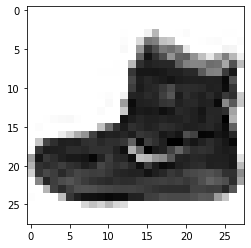

In [20]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [21]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) /255.0
feature_maps = conv_acti.predict(inputs)

In [23]:
print(feature_maps.shape)

(1, 28, 28, 32)


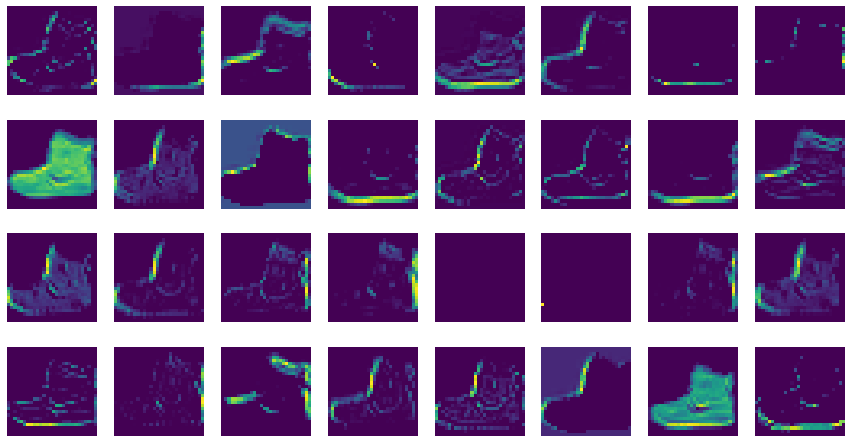

In [24]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4) :
  for j in range(8) :
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')

plt.show()

In [27]:
# 두 번째 합성곱 층
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) /255.0
feature_maps = conv2_acti.predict(inputs)

print(feature_maps.shape)

(1, 14, 14, 64)


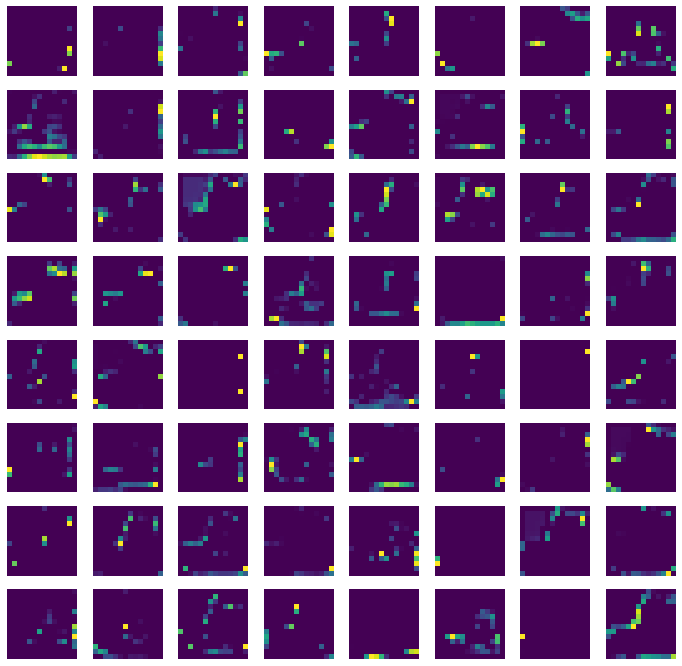

In [28]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8) :
  for j in range(8) :
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')

plt.show()